In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

diabetes = pd.read_csv("C:/Users/Rahul/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv")

diabetes.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

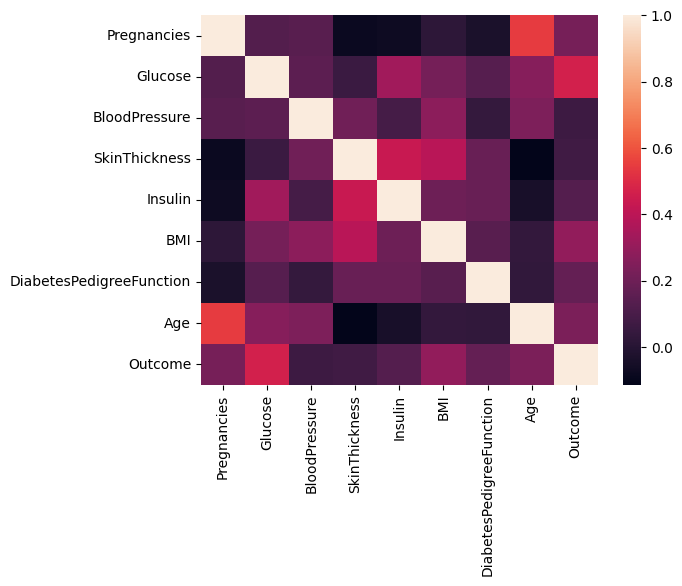

In [33]:
corr = diabetes.corr()
print(corr)
sns.heatmap(corr,xticklabels = corr.columns, yticklabels= corr.columns)



In [27]:
train = diabetes[:700]
test = diabetes[700:]

trainingLabels = np.asarray(train['Outcome'])
trainingData = np.asarray(train.drop('Outcome', axis=1))
testingLabels = np.asarray(test['Outcome'])
testingData = np.asarray(test.drop('Outcome', axis=1))

means = np.mean(trainingData, axis = 0)
stds = np.std(trainingData, axis=0)

trainingData = (trainingData - means)/ stds
testingData = (testingData - means)/ stds

diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainingData, trainingLabels)

accuracy = diabetesCheck.score(testingData, testingLabels)
print(f'Accuracy: {accuracy * 100:.2f}')



Accuracy: 80.88
